<a href="https://colab.research.google.com/github/vyasashish/machinelearning/blob/master/Questions_Graded_Project_German_Traffic_Sign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# German Traffic Sign Recognition
Multi-class, single-image classification

### Dataset
The German Traffic Sign Benchmark is a multi-class, single-image classification challenge held at the International Joint Conference on Neural Networks (IJCNN) 2011. They cordially invite researchers from relevant fields to participate: The competition is designed to allow for participation without special domain knowledge. Their benchmark has the following properties:

- Single-image, multi-class classification problem
- More than 40 classes
- More than 50,000 images in total
- Large, lifelike database

#### Notes
- For this project, we have reduced the number of images. There are around 16,500+ images in the dataset provided. You can check “label_details” folder for getting information about the classes.
- If the model is taking too much time to get trained then you can reduce the number of classes. There are around 43 classes in the dataset, model should be trained on a minimum of 15 classes.

In [1]:
# Imports
import pickle
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os
import math
from sklearn.utils import shuffle
import matplotlib.image as mpimg
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense, Dropout, Convolution2D, Flatten, Input, Conv2D, MaxPooling2D, Lambda
from keras.callbacks import ModelCheckpoint, EarlyStopping, Callback, LearningRateScheduler
from keras.optimizers import SGD
from keras.models import Model
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

Mount Google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Change current working directory to project folder

In [3]:
# Setting the current working directory
import os;
os.chdir('/content/drive/My Drive/Great Learning/Computer Vision Project 1')
!ls 

Meta.zip  Train  Train.zip


### Extract the zip file
- Extract Dataset from Train.zip


In [ ]:
#### Add your code here ####
# Extract content from zipfile
from zipfile import ZipFile

with ZipFile('Train.zip', 'r') as zip:
  zip.extractall()

Preprocessing


In [4]:
import numpy as np
from skimage import color, exposure, transform

NUM_CLASSES = 43
IMG_SIZE = 48


def preprocess_img(image):
    image = cv2.imread(image)
    image_rs = cv2.resize(image, (32, 32), 3)
    R, G, B = cv2.split(image_rs)
    img_r = cv2.equalizeHist(R)
    img_g = cv2.equalizeHist(G)
    img_b = cv2.equalizeHist(B)
    new_image = cv2.merge((img_r, img_g, img_b))

    return new_image

def get_class(img_path):
    return int(img_path.split('/')[-2])    

Function to load images

Define a function to load the images from the extracted folder and map each image with class

In [17]:
from skimage import io
class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 

def get_class(img_path):
    return int(img_path.split('/')[-2])         
    
def load_metadata(path):
    metadata = []
    exts = []
    for i in os.listdir(path):
      for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            if int(i)>=20 and int(i)<=35:
              ext = os.path.splitext(f)[1]
              if ext == '.png':
                metadata.append(IdentityMetadata(path, i, f))
                exts.append(ext)
            
    return np.array(metadata)

metadata = load_metadata('Train')  

In [ ]:
def load_image(path):
    img = cv2.imread(path,1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

#### Add your code here ####
n = np.random.randint(1, len(metadata))
img_path = metadata[n].image_path()
img = load_image(img_path)

print(labels[n])


fig = plt.figure(figsize = (15, 7.2))
ax = fig.add_subplot(1, 1, 1)
_ = plt.imshow(img)    

NameError: ignored

In [ ]:

from skimage import io

imgs = []
labels = []

for obj in metadata:
  try:
    img = preprocess_img(obj.image_path())
    label = get_class(obj.image_path())
    imgs.append(img)
    labels.append(label)
  except:
     obj.image_path()



In [ ]:
X = np.array(imgs, dtype='float32')
# Make one hot targets
Y = np.eye(NUM_CLASSES, dtype='uint8')[labels]

### Initialize ImageDataGenerator (7 Marks)
- Rescale the images
- Specify value for validation_split & get 75% data in training and 25% data in test

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X, Y,
                                                  test_size=0.25, random_state=42)

datagen = ImageDataGenerator(featurewise_center=False,
                             featurewise_std_normalization=False,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.1,
                             rotation_range=10.)

datagen.fit(X_train)





/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_first" (channels on axis 1), i.e. expected either 1, 3 or 4 channels on axis 1. However, it was passed an array with shape (29406, 32, 32, 3) (32 channels).
  ' channels).')


In [ ]:
X_train[0].shape

(32, 32, 3)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input dat

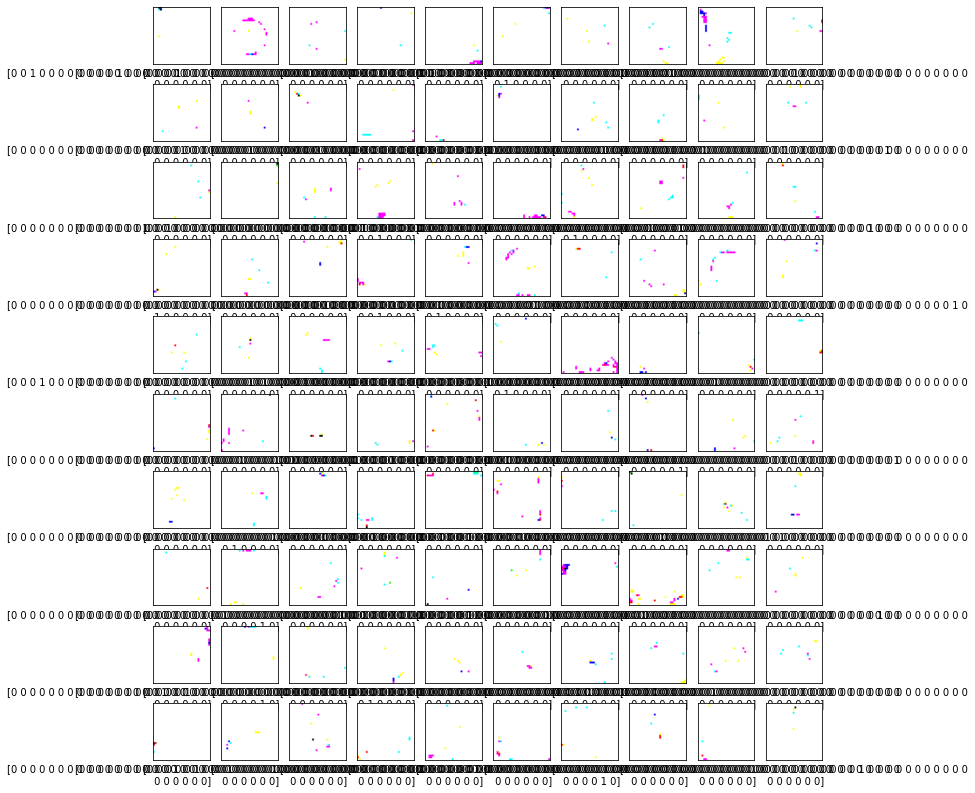

In [ ]:
def showRandomImages(gray = False):
    fig = plt.figure(figsize=(12, 14))
    for i in range(0, 100):
        number = np.random.randint(0, len(X_train))
        axis = fig.add_subplot(10,10,i+1)
        axis.set_xlabel(Y_train[number])
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        if not gray:
            axis.imshow(X_train[number])
        else:
            axis.imshow(X_train[number], cmap='gray')
    plt.show()

showRandomImages()

### Get training data from ImageDataGenerator (5 Marks)
- Give directory path
- Give target size
- Give batch_size
- Specify classes, if you wish to use less number of classes you need to give class names in a list (Atleast 15 classes should be there)
- Specify class_mode
- Specify color_mode
- Specify subset

You can get details here
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

### Get validation data from ImageDataGenerator (5 Marks)
- Give directory path
- Give target size
- Give batch_size
- Specify classes, if you wish to use less number of classes you need to give class names in a list (Atleast 15 classes should be there)
- Specify class_mode
- Specify color_mode
- Specify subset

You can get details here
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

### Define model (10 Marks)
- Initialize a Sequential Model
- Add Convolution, Maxpool, Dropout, Flatten & Dense layers according to your model architecture

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.optimizers import SGD
from keras import backend as K
K.set_image_data_format('channels_first')


def cnn_model():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), padding='same',
                     input_shape=(3, IMG_SIZE, IMG_SIZE),
                     activation='relu'))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (3, 3), padding='same',
                     activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(128, (3, 3), padding='same',
                     activation='relu'))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(NUM_CLASSES, activation='softmax'))
    return model

### Compile the model (5 Marks)
- Specify optimizer, loss & metrics

In [ ]:
from keras.optimizers import SGD

# Reinitialize model and compile
model = cnn_model()
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

### Get model summary (3 Marks)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 48, 48)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 46, 46)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 23, 23)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 32, 23, 23)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 64, 23, 23)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 64, 21, 21)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 10, 10)       

### Fit the model (5 Marks)
- Specify epochs
- Specify batch_size
- Give validation_data
- Validation accuracy should be more than 90%

In [ ]:
# Train again
epochs = 30
model.fit(datagen.flow(X_train, Y_train, batch_size=batch_size),
                    steps_per_epoch=X_train.shape[0],
                    epochs=epochs,
                    validation_data=(X_val, Y_val),
                    callbacks=[LearningRateScheduler(lr_schedule),
                               ModelCheckpoint('model.h5', save_best_only=True)]
                    )

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_first" (channels on axis 1), i.e. expected either 1, 3, or 4 channels on axis 1. However, it was passed an array with shape (29406, 32, 32, 3) (32 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


Epoch 1/30


InvalidArgumentError: ignored

### Draw plots (5 Marks)
- Plot training accuracy and validation accuracy with respect to epochs
- Plot training loss and validation loss with respect to epochs

## Future work (ungraded)
- Try to apply transfer learning and see if you can improve the performance.